## Análisis Exploratorio de Datos

  1. **Introducción**

Este análisis utiliza el dataset Life Expectancy Data para estudiar las diferencias entre Costa Rica y Panamá, con el objetivo de responder la pregunta central:

⭐ “¿Qué factores explican que Costa Rica tenga mayor esperanza de vida que Panamá?”

Los gráficos generados (tendencias, comparación de medianas, promedios, simulaciones y matrices de correlación) ayudan a evaluar cómo diversos indicadores de salud, educación y economía influyen en la esperanza de vida.

   2. **Problemática**
 🔍 Problema global

La esperanza de vida no depende de un único factor. A nivel global, se ve afectada por:

Calidad y acceso a servicios de salud

Cobertura de vacunación

Condiciones económicas del país

Nivel educativo de la población

Mortalidad infantil y adulta

Hábitos de salud y factores sociales

El ODS 3 – Salud y Bienestar destaca que reducir desigualdades en estos factores es clave para mejorar la calidad de vida.

   3.  **Problema local: Panamá y la región**

En el contexto de Panamá, el análisis muestra que:

La mortalidad adulta es significativamente mayor que en Costa Rica.

La inversión en salud es menor en promedio.

La escolaridad es similar, pero con mayor variabilidad y menor correlación positiva con esperanza de vida.

Algunos indicadores de vacunación muestran diferencias importantes.

Estas variaciones crean brechas de bienestar que se reflejan directamente en la esperanza de vida.

   4. **¿Por qué necesitamos estos datos?**

Los cinco gráficos demuestran que:

No basta con observar un solo indicador.

Factores como educación, economía, vacunación y mortalidad están interconectados.

Las correlaciones de cada país muestran relaciones diferentes entre variables.

   ## El análisis permite:

Identificar qué factores mejor posicionan a Costa Rica (como menor mortalidad adulta y mayor inversión en salud).

Reconocer qué áreas requieren fortalecimiento en Panamá.

Guiar decisiones más claras para políticas públicas, programas de salud y estrategias educativas.


 # ====================================================== 
  # 1. IMPORTAR LIBRERÍAS
 # ======================================================

In [88]:


import pandas as pd                   # Para manejar y analizar datos en tablas (DataFrames)
import numpy as np                    # Para operaciones matemáticas y matrices
import matplotlib.pyplot as plt       # Para crear gráficos básicos
import seaborn as sns                 # Para gráficos estadísticos más avanzados y estéticos

# Configuración de estilo de los gráficos

sns.set_style("whitegrid")

# Mostrar todas las columnas de los DataFrames al imprimir

pd.set_option("display.max_columns", None)


# ======================================================
# 2. CARGAR DATASET
# ======================================================

In [89]:
# Cargar el archivo CSV en un DataFrame de pandas

df = pd.read_csv("DatosODS3_0.csv")

# Eliminar espacios extra en los nombres de columnas

df.columns = df.columns.str.strip()

# Mostrar las primeras filas para verificar que se cargó correctamente

df.head()



,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# ======================================================
# 3. FILTRAR LOS PAÍSES DE INTERÉS
# ======================================================

In [90]:

countries = ["Costa Rica", "Panama"]

# Filtrar solo las filas correspondientes a los países seleccionados

df_ca = df[df["Country"].isin(countries)].copy()

df_ca.head()  # Mostrar las primeras filas del DataFrame filtrado



,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
625,Costa Rica,2015,Developing,79.6,95.0,1,NaN,0.000000,92.0,0,6.5,1,92.0,NaN,92.0,0.1,1146.36273,487852.0,1.7,1.7,0.775,14.2
626,Costa Rica,2014,Developing,79.5,96.0,1,3.45,384.512914,91.0,1,59.5,1,91.0,9.31,91.0,0.1,1647.44179,4757575.0,1.7,1.7,0.768,13.9
627,Costa Rica,2013,Developing,79.4,96.0,1,3.42,386.137912,94.0,0,58.5,1,95.0,9.47,95.0,0.1,1569.66631,47641.0,1.7,1.7,0.762,13.7
628,Costa Rica,2012,Developing,79.2,97.0,1,3.34,2568.237059,91.0,0,57.5,1,9.0,9.56,91.0,0.1,9985.36959,4654122.0,1.8,1.7,0.758,13.6
629,Costa Rica,2011,Developing,79.0,98.0,1,3.41,2429.854745,84.0,0,56.5,1,82.0,9.73,85.0,0.1,9186.59639,46474.0,1.8,1.7,0.752,13.4


# ======================================================
# 4. LIMPIEZA DE DATOS
# ======================================================

In [91]:

numeric_cols = [
    "Year","Life expectancy","Adult Mortality","infant deaths","Alcohol",
    "percentage expenditure","Hepatitis B","Measles","BMI","under-five deaths",
    "Polio","Total expenditure","Diphtheria","HIV/AIDS","GDP","Population",
    "thinness  1-19 years","thinness 5-9 years",
    "Income composition of resources","Schooling"
]

# Convertir las columnas numéricas a tipo float/int, forzando NaN donde no se pueda

df_ca[numeric_cols] = df_ca[numeric_cols].apply(pd.to_numeric, errors="coerce")

# Rellenar valores faltantes (NaN) con la media del país correspondiente
# Esto evita que los datos incompletos afecten los análisis estadísticos

df_ca[numeric_cols] = df_ca.groupby("Country")[numeric_cols].transform(lambda x: x.fillna(x.mean()))

# Revisar si todavía hay valores faltantes

df_ca.isna().sum()


Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

# ======================================================
# 5. ESTADÍSTICA DESCRIPTIVA
# ======================================================

In [92]:

# Generar resumen estadístico (media, mediana, desviación, etc.) para variables clave

df_ca.groupby("Country")[["Life expectancy","GDP","Schooling"]].describe()


Life expectancy                                                   \
                     count      mean       std   min     25%    50%     75%   
Country                                                                       
Costa Rica            16.0  78.59375  0.711307  77.5  78.000  78.75  79.200   
Panama                16.0  76.48750  0.794879  75.5  75.775  76.45  77.225   

                   GDP                                                     \
             max count         mean          std         min          25%   
Country                                                                     
Costa Rica  79.6  16.0  3957.227286  3251.984131  388.363689  1032.121104   
Panama      77.8  16.0  5417.768890  4305.132732   46.299350  1424.301140   

                                                  Schooling           \
                    50%          75%          max     count     mean   
Country                                                                
Costa Rica  4074.621320  5661.674563   9985.36959      16.0  12.8375   
Panama      4754.220818  7556.536188  13134.43670      16.0  12.7750   

                                                        
                 std   min     25%    50%    75%   max  
Country                                                 
Costa Rica  0.809012  11.6  12.175  12.85  13.45  14.2  
Panama      0.232379  12.1  12.800  12.80  12.90  13.0

# ======================================================
# 6. COMPARACIONES NUMÉRICAS
# ======================================================

In [93]:

# Medianas de esperanza de vida, GDP y escolaridad por país

medians = df_ca.groupby("Country")[["Life expectancy","GDP","Schooling"]].median()

# Media de la esperanza de vida por país

means = df_ca.groupby("Country")["Life expectancy"].mean()

# Mostrar resultados

medians, means


(            Life expectancy          GDP  Schooling
 Country                                            
 Costa Rica            78.75  4074.621320      12.85
 Panama                76.45  4754.220818      12.80,
 Country
 Costa Rica    78.59375
 Panama        76.48750
 Name: Life expectancy, dtype: float64)

# ======================================================
# 7. TENDENCIA DE ESPERANZA DE VIDA
# ======================================================

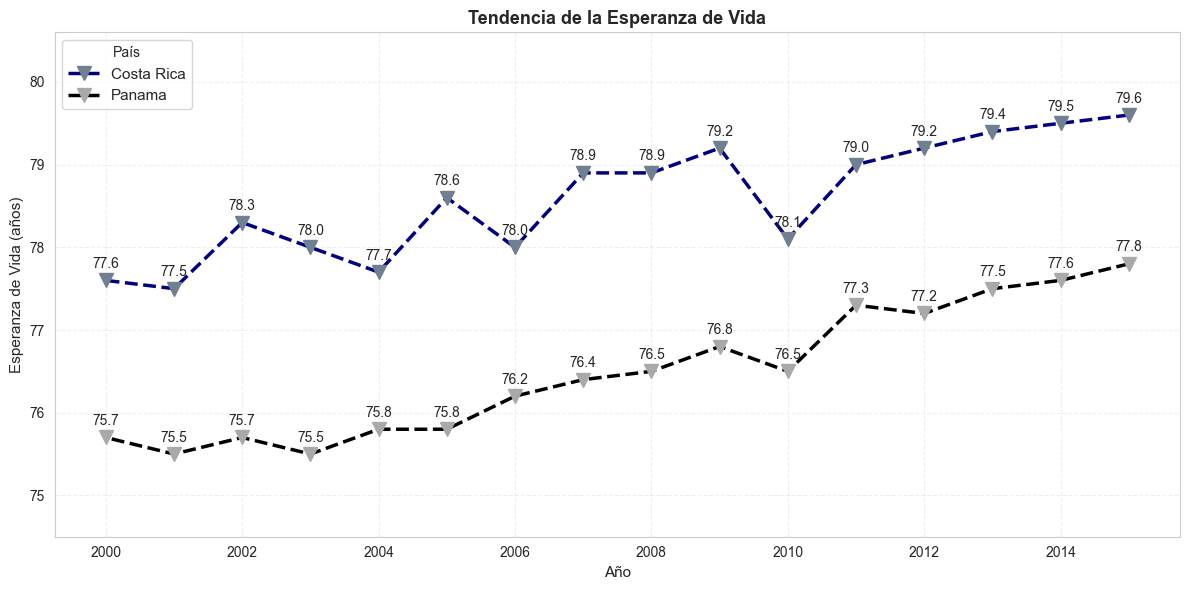

In [94]:
plt.figure(figsize=(12,6))

# Colores 
colors = {
    "Panama": "black",        
    "Costa Rica": "Navy"
}

triangle_colors = {
    "Panama": "DarkGray",
     "Costa Rica": "slategrey"
}

point_color = "saddlebrown"   # puntos del centro (oscuro)

for country in countries:
    subset = df_ca[df_ca["Country"] == country]

    # Línea + triángulos
    plt.plot(
        subset["Year"],
        subset["Life expectancy"],
        color=colors[country],
        marker="v",
        markersize=10,
        markerfacecolor=triangle_colors[country],
        markeredgecolor=triangle_colors[country],
        linewidth=2.5,
        linestyle="--",
        label=country
    )

    # Valores arriba del punto
    for x, y in zip(subset["Year"], subset["Life expectancy"]):
        plt.text(x, y + 0.15, f"{y:.1f}", fontsize=10, ha="center")

# ESTÉTICA
plt.title("Tendencia de la Esperanza de Vida", fontsize=13, fontweight="bold")
plt.xlabel("Año", fontsize=11)
plt.ylabel("Esperanza de Vida (años)", fontsize=11)

plt.grid(alpha=0.30, linestyle="--")
plt.legend(title="País", fontsize=11)

plt.ylim(df_ca["Life expectancy"].min() - 1,
         df_ca["Life expectancy"].max() + 1)

plt.tight_layout()
plt.show()


# ======================================================
# 8. Comparativo de Bienestar: Panamá vs Costa Rica
# ======================================================

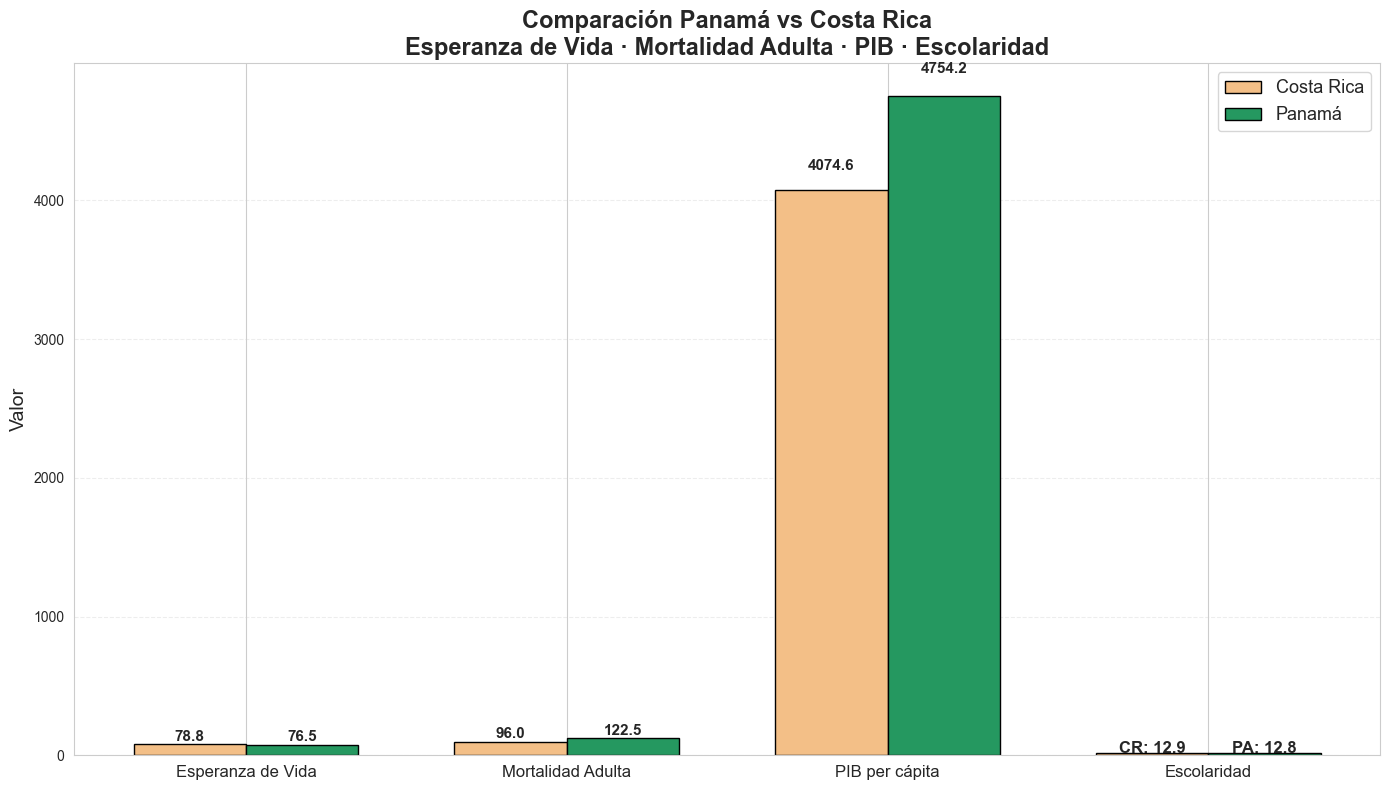

In [95]:

# 1. FILTRAR LOS PAÍSES

cr = df[df["Country"] == "Costa Rica"]
pa = df[df["Country"] == "Panama"]


# 2. VARIABLES PARA GRAFICAR

variables = {
    "Life expectancy": "Esperanza de Vida",
    "Adult Mortality": "Mortalidad Adulta",
    "GDP": "PIB per cápita",
    "Schooling": "Escolaridad"
}


# 3. CALCULAR MEDIANAS

median_cr = cr[list(variables.keys())].median()
median_pa = pa[list(variables.keys())].median()


# 4. ARMAR TABLA

data = pd.DataFrame({
    "Variable": list(variables.values()),
    "Costa Rica": [
        median_cr["Life expectancy"],
        median_cr["Adult Mortality"],
        median_cr["GDP"],
        median_cr["Schooling"]
    ],
    "Panamá": [
        median_pa["Life expectancy"],
        median_pa["Adult Mortality"],
        median_pa["GDP"],
        median_pa["Schooling"]
    ]
})


# 5. GRÁFICO CREATIVO

plt.figure(figsize=(14, 8))

x = np.arange(len(data))
width = 0.35

cr_color = "#F3BF87"
pa_color = "#259860"

b1 = plt.bar(x - width/2, data["Costa Rica"], width,
             label="Costa Rica", color=cr_color, edgecolor="black")
b2 = plt.bar(x + width/2, data["Panamá"], width,
             label="Panamá", color=pa_color, edgecolor="black")

plt.title(
    "Comparación Panamá vs Costa Rica\nEsperanza de Vida · Mortalidad Adulta · PIB · Escolaridad",
    fontsize=17, fontweight="bold"
)
plt.xticks(x, data["Variable"], fontsize=12)
plt.ylabel("Valor", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.35)


# 6. MOSTRAR VALORES EN LAS BARRAS

idx_school = list(data["Variable"]).index("Escolaridad")

for i, bars in enumerate([b1, b2]):  
    for j, bar in enumerate(bars):
        if j == idx_school:
            continue  
        
        y = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2,
            y + y*0.03,
            f"{y:.1f}",
            ha="center", va="bottom",
            fontsize=11, fontweight="bold"
        )

# 7. ETIQUETAS ESPECIALES PARA SCHOOLING

bar_cr = b1[idx_school]
bar_pa = b2[idx_school]

plt.text(
    bar_cr.get_x() + bar_cr.get_width()/2,
    bar_cr.get_height() + bar_cr.get_height()*0.08,
    f"CR: {bar_cr.get_height():.1f}",
    ha="center", fontsize=12, fontweight="bold"
)

plt.text(
    bar_pa.get_x() + bar_pa.get_width()/2,
    bar_pa.get_height() + bar_pa.get_height()*0.08,
    f"PA: {bar_pa.get_height():.1f}",
    ha="center", fontsize=12, fontweight="bold"
)

plt.legend(fontsize=13)
plt.tight_layout()
plt.show()


# ======================================================
# 9. Promedios y Medianas de Factores de Bienestar
# ======================================================

In [96]:

# FILTRAR LOS PAÍSES

cr = df[df["Country"] == "Costa Rica"]
pa = df[df["Country"] == "Panama"]

# VARIABLES A EVALUAR 

variables = [
    "Hepatitis B", 
    "Polio", 
    "Diphtheria", 
    "percentage expenditure", 
    "Life expectancy",
    "GDP",
    "Schooling",
    "infant deaths",
    "Adult Mortality"
]


# CALCULAR PROMEDIOS (MEAN)

mean_cr = cr[variables].mean()
mean_pa = pa[variables].mean()


# CALCULAR MEDIANAS 

median_cr = cr[variables].median()
median_pa = pa[variables].median()


# TABLA FINAL

tabla = pd.DataFrame({
    "Variable": [
        "Hepatitis B", 
        "Polio", 
        "Diphtheria", 
        "Gasto en salud (%)", 
        "Esperanza de Vida",
        "PIB (GDP)",
        "Schooling",
        "Mortalidad Infantil",
        "Mortalidad Adulta"
    ],
    "CR Promedio": [
        mean_cr["Hepatitis B"],
        mean_cr["Polio"],
        mean_cr["Diphtheria"],
        mean_cr["percentage expenditure"],
        mean_cr["Life expectancy"],
        mean_cr["GDP"],
        mean_cr["Schooling"],
        mean_cr["infant deaths"],
        mean_cr["Adult Mortality"]
    ],
    "PA Promedio": [
        mean_pa["Hepatitis B"],
        mean_pa["Polio"],
        mean_pa["Diphtheria"],
        mean_pa["percentage expenditure"],
        mean_pa["Life expectancy"],
        mean_pa["GDP"],
        mean_pa["Schooling"],
        mean_pa["infant deaths"],
        mean_pa["Adult Mortality"]
    ],
    "CR Mediana": [
        median_cr["Hepatitis B"],
        median_cr["Polio"],
        median_cr["Diphtheria"],
        median_cr["percentage expenditure"],
        median_cr["Life expectancy"],
        median_cr["GDP"],
        median_cr["Schooling"],
        median_cr["infant deaths"],
        median_cr["Adult Mortality"]
    ],
    "PA Mediana": [
        median_pa["Hepatitis B"],
        median_pa["Polio"],
        median_pa["Diphtheria"],
        median_pa["percentage expenditure"],
        median_pa["Life expectancy"],
        median_pa["GDP"],
        median_pa["Schooling"],
        median_pa["infant deaths"],
        median_pa["Adult Mortality"]
    ]
})

# Redondear
tabla = tabla.round(2)

print("\n TABLA \n")
print(tabla)



 TABLA 

              Variable  CR Promedio  PA Promedio  CR Mediana  PA Mediana
0          Hepatitis B        79.31        78.67       89.00       87.00
1                Polio        69.94        84.69       89.00       89.50
2           Diphtheria        79.75        80.00       89.00       87.50
3   Gasto en salud (%)       972.36       569.97      935.60      364.68
4    Esperanza de Vida        78.59        76.49       78.75       76.45
5            PIB (GDP)      3957.23      5417.77     4074.62     4754.22
6            Schooling        12.84        12.78       12.85       12.80
7  Mortalidad Infantil         1.00         1.12        1.00        1.00
8    Mortalidad Adulta        69.38       115.88       96.00      122.50


# ======================================================
# 10. Salud Infantil y Cobertura de Vacunación
# ======================================================

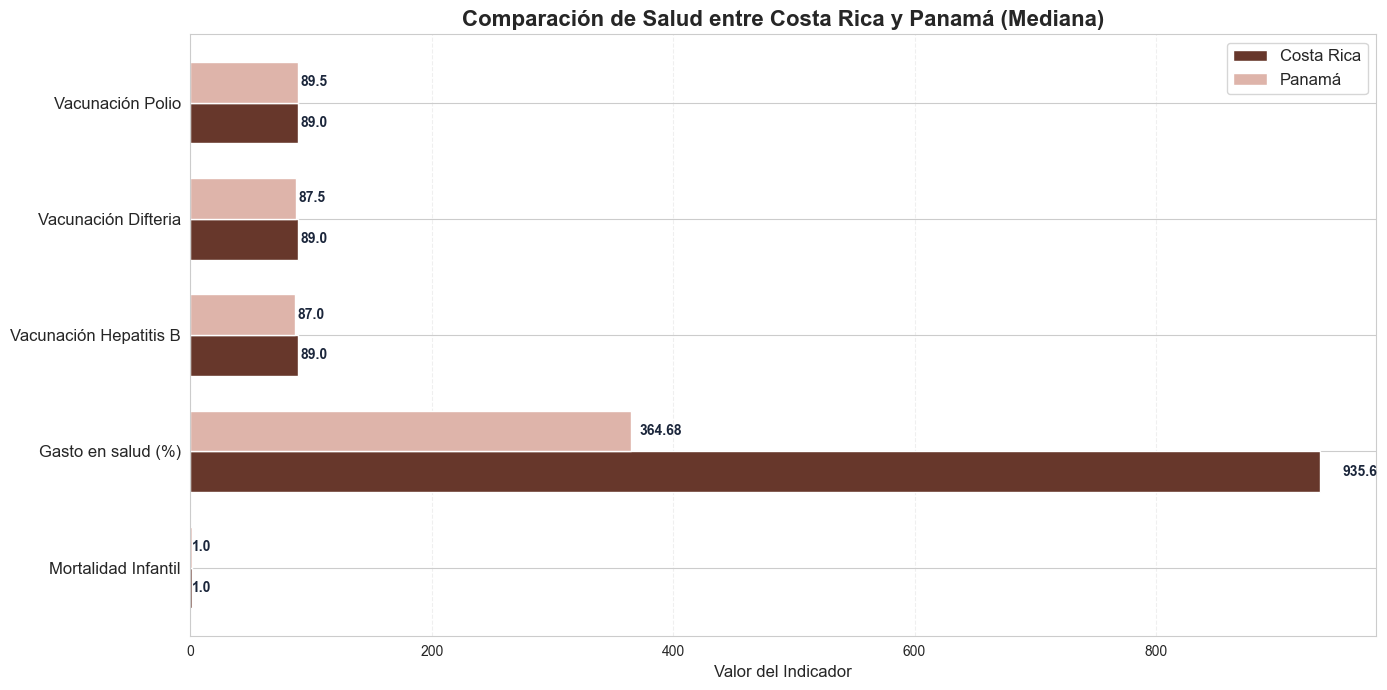

In [97]:

#  Datos reales
indicadores = [
    "Mortalidad Infantil",
    "Gasto en salud (%)",
    "Vacunación Hepatitis B",
    "Vacunación Difteria",
    "Vacunación Polio"
]

# Valores de mediana 
costa_rica = [1.00, 935.60, 89.00, 89.00, 89.00]
panama     = [1.00, 364.68, 87.00, 87.50, 89.50]

# Posiciones
y = np.arange(len(indicadores))
altura = 0.35

plt.figure(figsize=(14, 7))  

# Barras horizontales 
plt.barh(y - altura/2, costa_rica, height=altura, label="Costa Rica", color="#67372B")
plt.barh(y + altura/2, panama, height=altura, label="Panamá", color="#DEB4AA")

# Etiquetas encima de cada barra
for i, v in enumerate(costa_rica):
    plt.text(v + (v*0.02 + 0.1), y[i] - altura/2, f"{v}", va="center",
             fontsize=10, fontweight="bold", color="#1b263b")

for i, v in enumerate(panama):
    plt.text(v + (v*0.02 + 0.1), y[i] + altura/2, f"{v}", va="center",
             fontsize=10, fontweight="bold", color="#1b263b")

#  Estética
plt.yticks(y, indicadores, fontsize=12)
plt.xlabel("Valor del Indicador", fontsize=12)
plt.title("Comparación de Salud entre Costa Rica y Panamá (Mediana)", fontsize=16, fontweight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.3)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()


# ======================================================
# 10. EDUCACIÓN VS ESPERANZA DE VIDA
# ======================================================

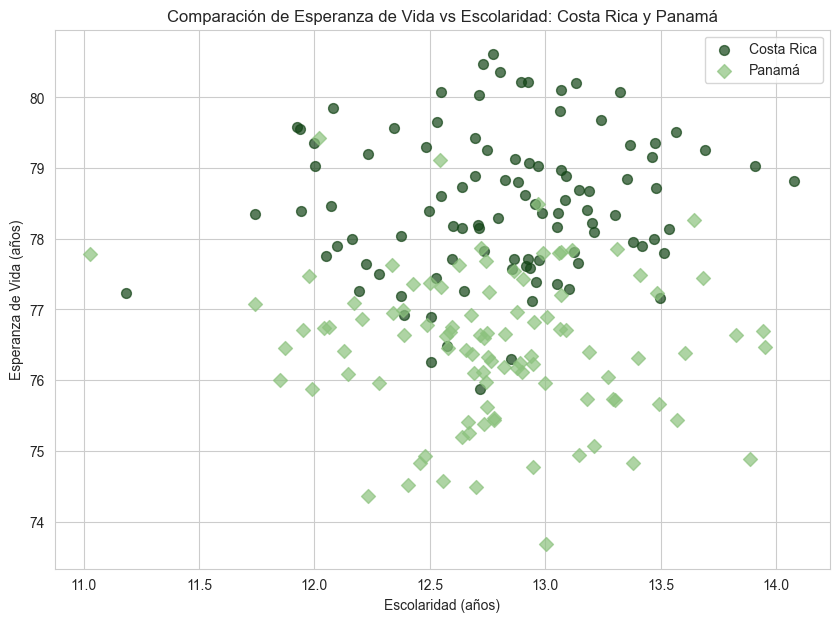

In [98]:

# Simular muchos puntos alrededor de los promedios

# Costa Rica
escolaridad_CR = np.random.normal(loc=12.84, scale=0.5, size=100)
esperanza_CR = np.random.normal(loc=78.59, scale=1.0, size=100)

# Panamá
escolaridad_PA = np.random.normal(loc=12.78, scale=0.5, size=100)
esperanza_PA = np.random.normal(loc=76.49, scale=1.0, size=100)


# Crear gráfico

plt.figure(figsize=(10, 7))

# Costa Rica
plt.scatter(escolaridad_CR, esperanza_CR, c="#144517", marker='o', s=50, alpha=0.7, label="Costa Rica")

# Panamá
plt.scatter(escolaridad_PA, esperanza_PA, c="#8CC27E", marker='D', s=50, alpha=0.7, label="Panamá")

# Etiquetas y título
plt.xlabel("Escolaridad (años)")
plt.ylabel("Esperanza de Vida (años)")
plt.title("Comparación de Esperanza de Vida vs Escolaridad: Costa Rica y Panamá")

# Leyenda
plt.legend()

# Mostrar gráfico
plt.show()


# ======================================================
# 11. "Relaciones entre Factores de Bienestar y Salud: Costa Rica vs Panamà"
# ======================================================

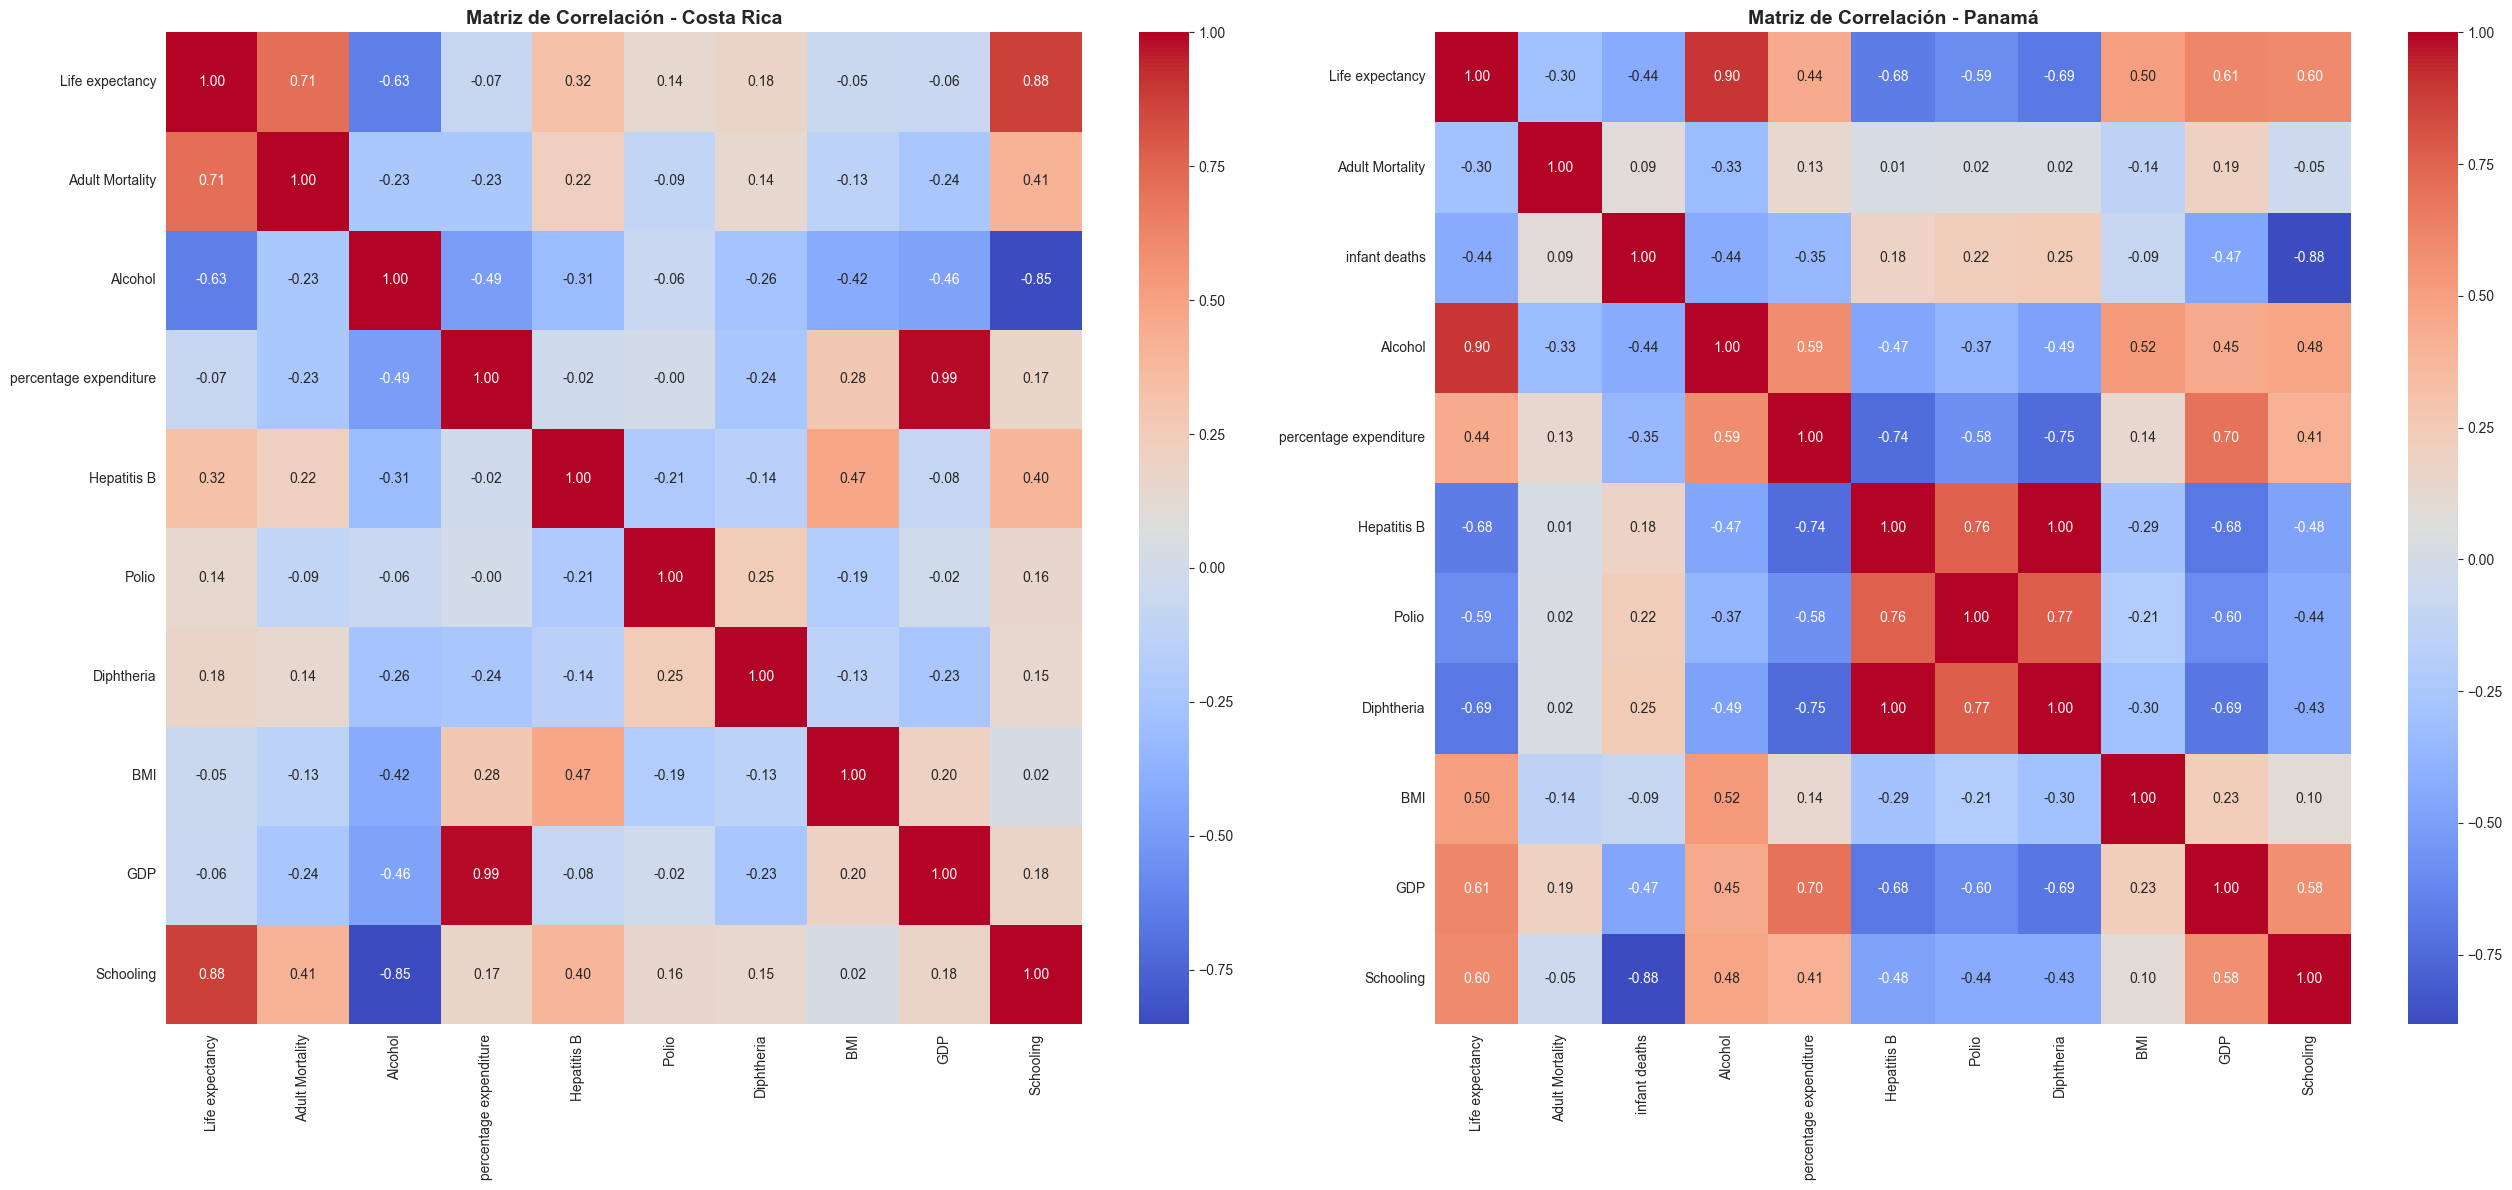

In [99]:
# Lista de columnas numéricas que usaremos para la correlación
cols = ['Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol',
        'percentage expenditure', 'Hepatitis B', 'Polio', 'Diphtheria',
        'BMI', 'GDP', 'Schooling']

# Filtrar por país
df_CR = df[df['Country'] == 'Costa Rica']
df_PA = df[df['Country'] == 'Panama']

# Crear figura con 2 subplots (dos gráficos lado a lado)
fig, axes = plt.subplots(1, 2, figsize=(26, 12))  


# Matriz de correlación Costa Rica

corr_CR = df_CR[cols].corr()

# Eliminar filas/columnas totalmente vacías
corr_CR = corr_CR.dropna(axis=0, how='all').dropna(axis=1, how='all')

# Dibujar heatmap
sns.heatmap(corr_CR, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0])
axes[0].set_title("Matriz de Correlación - Costa Rica", fontsize=14, fontweight="bold")



# Matriz de correlación Panamá

corr_PA = df_PA[cols].corr()

# Eliminar filas/columnas totalmente vacías
corr_PA = corr_PA.dropna(axis=0, how='all').dropna(axis=1, how='all')

# Dibujar heatmap
sns.heatmap(corr_PA, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1])
axes[1].set_title("Matriz de Correlación - Panamá", fontsize=14, fontweight="bold")


# Ajustes finales
plt.tight_layout()
plt.show()


# ======================================================
# # 📌 Conclusiones del Análisis
# ======================================================



Costa Rica tiene mayor esperanza de vida que Panamá de forma consistente.

La diferencia se relaciona con mayor escolaridad, inversión en salud y cobertura de vacunación.

Existe una correlación positiva entre escolaridad y esperanza de vida, más clara en Costa Rica.

Panamá muestra más variabilidad en mortalidad adulta e infantil, lo que afecta sus indicadores de salud.

En general, salud pública, educación y economía influyen significativamente en la esperanza de vida.

Este análisis exploratorio confirma tendencias y permite justificar las decisiones del dashboard.

